In [20]:
#special thanks to Niraj Verma for the only good PCA regression notebook on the internet
#https://www.kaggle.com/nirajvermafcb/principal-component-analysis-with-scikit-learn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import itertools
from scipy.stats import skew
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from scipy.stats.stats import pearsonr
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [21]:
train = pd.read_csv("input/train.csv") # no missing data
test = pd.read_csv("input/test.csv")
ids = test.id
train = train.drop("id", axis=1)
X_test = test.drop("id", axis=1)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train.target)
y = le.transform(train.target)
X = train.loc[:, train.columns != 'target']

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.40209324, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       ..., 
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [ 0.40209324, -0.21010603, -0.30716546, ...,  1.33702606,
         9.792457  , -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
         1.64894093, -0.10496314]])

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-0.32222607,  0.26164028, -0.10127091, ..., -0.1845421 ,
        -0.04657533,  0.09783466],
       [-1.61773292, -0.43175741, -1.12120153, ...,  0.10143413,
        -0.00667425,  0.03050828],
       [-1.52981842, -0.01389333, -0.47426908, ..., -0.12895326,
         0.04483888,  0.12227957],
       ..., 
       [-1.28627087,  1.36678536,  0.64118314, ..., -0.19181056,
        -0.08223165, -0.02714468],
       [-0.04074612, -0.08743913,  1.46946579, ...,  0.2929369 ,
         0.0633483 ,  0.08910712],
       [ 0.3995819 ,  0.85631772,  1.07054837, ..., -0.25991187,
        -0.28322464,  0.16725471]])

In [25]:
pca.get_covariance()

array([[  1.00001616e+00,   3.13323764e-02,  -2.78073493e-02, ...,
          3.72649252e-02,   5.47774353e-02,   8.17842429e-02],
       [  3.13323764e-02,   1.00001616e+00,   8.25742787e-02, ...,
          2.63832604e-02,  -8.21952368e-03,   5.45940201e-02],
       [ -2.78073493e-02,   8.25742787e-02,   1.00001616e+00, ...,
         -1.24170192e-02,   6.69218503e-02,   6.81424810e-03],
       ..., 
       [  3.72649252e-02,   2.63832604e-02,  -1.24170192e-02, ...,
          1.00001616e+00,   1.04227400e-01,  -4.51128260e-05],
       [  5.47774353e-02,  -8.21952368e-03,   6.69218503e-02, ...,
          1.04227400e-01,   1.00001616e+00,  -3.65279136e-03],
       [  8.17842429e-02,   5.45940201e-02,   6.81424810e-03, ...,
         -4.51128260e-05,  -3.65279136e-03,   1.00001616e+00]])

In [26]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([ 0.08555694,  0.06587049,  0.04177069,  0.03177853,  0.02821606,
        0.02616521,  0.02389526,  0.02382949,  0.02252596,  0.02065693,
        0.01883292,  0.0185842 ,  0.01849353,  0.01716274,  0.01623459,
        0.01573562,  0.014751  ,  0.01427313,  0.01394629,  0.01314063,
        0.01260882,  0.01232527,  0.01214582,  0.01140202,  0.01112323,
        0.01091383,  0.01048613,  0.01041515,  0.01019281,  0.01012226,
        0.00998693,  0.0099173 ,  0.00964471,  0.00942646,  0.00912104,
        0.00903544,  0.00885692,  0.00873804,  0.0085263 ,  0.00835652,
        0.00823168,  0.00814551,  0.00785824,  0.00771585,  0.00761602,
        0.00749504,  0.00736073,  0.00706931,  0.00704883,  0.00692985,
        0.00678267,  0.00672523,  0.00658681,  0.00652646,  0.00633503,
        0.00622531,  0.00613808,  0.00571476,  0.00562816,  0.00558607,
        0.00554224,  0.00536831,  0.00529224,  0.0052718 ,  0.00522117,
        0.00502023,  0.00489848,  0.00475225,  0.00466247,  0.00

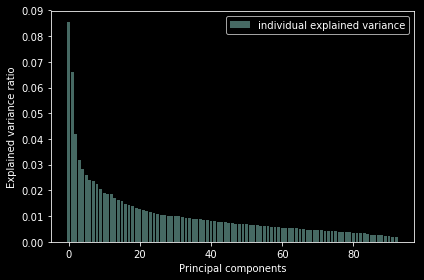

In [27]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [28]:
pca=PCA(n_components=10)
X_new=pca.fit_transform(X)
X_new

array([[-0.32066491,  0.26140029, -0.12439766, ...,  0.56169813,
        -0.20438951,  0.36563271],
       [-1.61786334, -0.43167369, -1.11828618, ...,  0.1493216 ,
        -0.64788246,  0.1556844 ],
       [-1.529944  , -0.01299558, -0.47722954, ...,  0.25110408,
        -0.78443638, -0.24952945],
       ..., 
       [-1.28680048,  1.36635489,  0.64110926, ..., -0.8328284 ,
        -0.31479394, -0.05658093],
       [-0.04120051, -0.08883532,  1.45356246, ..., -0.40068383,
         0.85953952,  0.58518857],
       [ 0.40040343,  0.85633357,  1.06454341, ..., -0.39750938,
        -0.01796395, -0.07495294]])

In [29]:
pca.get_covariance()

array([[ 0.90749429,  0.03768746, -0.03269038, ...,  0.04151131,
         0.03572   ,  0.03023007],
       [ 0.03768746,  1.11139221,  0.09345119, ...,  0.04871621,
         0.01339687,  0.05527733],
       [-0.03269038,  0.09345119,  1.29899837, ..., -0.02082612,
         0.07364427, -0.00494372],
       ..., 
       [ 0.04151131,  0.04871621, -0.02082612, ...,  0.77882009,
         0.0644421 ,  0.00562441],
       [ 0.03572   ,  0.01339687,  0.07364427, ...,  0.0644421 ,
         0.90151623, -0.00683643],
       [ 0.03023007,  0.05527733, -0.00494372, ...,  0.00562441,
        -0.00683643,  0.78933122]])

In [30]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([ 0.08555692,  0.06587046,  0.04176781,  0.03176541,  0.02819967,
        0.02611134,  0.02380426,  0.02371885,  0.02243908,  0.02057835])

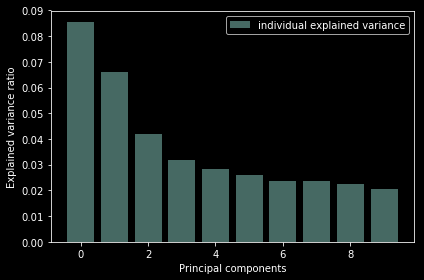

In [31]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(10), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(49502, 93)

In [33]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [35]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 3)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)    

KeyboardInterrupt: 

In [ ]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
#seeing how the x-values of the pca will compare to the normal x-values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)
X_train.shape

In [ ]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 3)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)   

In [ ]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)